# Name : Vignesh Nagarajan  (UID: 606185377)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split


In [6]:
%cd '/content/drive/MyDrive/219/Project5'

/content/drive/MyDrive/219/Project5


In [7]:
data = pd.read_csv("Diamonds_ece219.csv")

In [8]:
data['girdle_min_enc'] = data['girdle_min'].replace({'XTN': 1, 'VTN':2, 'TN':3, 'STN':4, 'M':5, 'STK':6, 'TK':7, 'VTK':8,'XTK' :9,'unknown':-10})
data['girdle_max_enc'] = data['girdle_max'].replace({'XTN': 1, 'VTN':2, 'TN':3, 'STN':4, 'M':5, 'STK':6, 'TK':7, 'VTK':8,'XTK' :9,'unknown':-10})

# Data inspection

In [9]:
# Categorical to numerical

cat2num = {'Very Good': 1, 'Excellent': 2}
color_dict = { 'M':1,
              'L':2,
             'K':3,
              'J' : 4,
           'I' : 5,
           'H': 6,
           'G': 7,
           'F': 8,
           'E': 9,
           'D': 10}

data['cut_enc'] = data['cut'].map(cat2num)
data['symmetry_enc'] = data['symmetry'].map(cat2num)
data['polish_enc'] = data['polish'].map(cat2num)
data['color_enc'] = data['color'].map(color_dict)

In [10]:
clarity_ranking = {
    'I3': 1,
    'I2': 2,
    'I1': 3,
    'SI2': 4,
    'SI1': 5,
    'VS2': 6,
    'VS1': 7,
    'VVS2': 8,
    'VVS1': 9,
    'IF': 10
}

data['clarity_enc'] = data['clarity'].map(clarity_ranking)


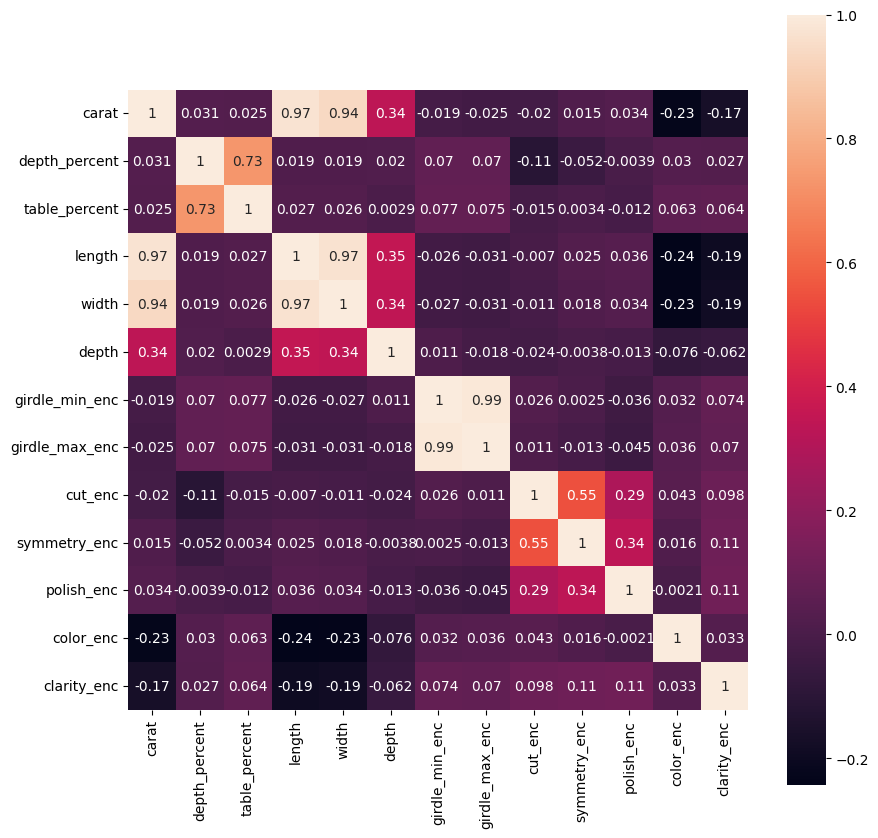

In [11]:
data = data.drop(columns=['Unnamed: 0'])
dataenc = data.copy(deep = True)
dataenc = dataenc.drop(columns= ['clarity','cut','symmetry','color','polish','girdle_min','girdle_max'])
data =data.drop(columns=['clarity_enc','cut_enc','symmetry_enc','color_enc','polish_enc','girdle_min_enc','girdle_max_enc'])
corr = dataenc.loc[:, dataenc.columns != 'price'].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
plt.show()



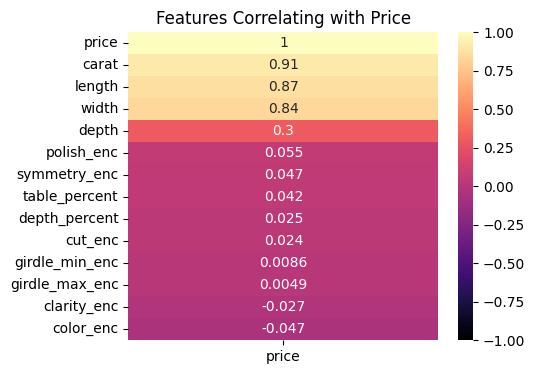

In [43]:
plt.figure(figsize = (5,4))
h_map = sns.heatmap(dataenc.corr()[["price"]].sort_values(by = "price",ascending=False),vmin=-1, vmax=1, annot=True,cmap ='magma')
h_map.set_title("Features Correlating with Price")
plt.show()


# Answer 1.1

As noted above in the first correlation map, length and width have a high correlation and have the same underlying domain knowledge, and hence are highly correlated. Same can be said about depth_percent and table_percent. We also note that length, width and carat have high correlations amongst themselves which makes sense because we know that carat weight is related to the length, width, and depth of a diamond.

From the second correlation map of features with target variable, we observe that carat, length and width have high correlations to the target variable "Price". This makes sense qualitatively since higher these mentioned feature values are, the price is also expected to be higher.

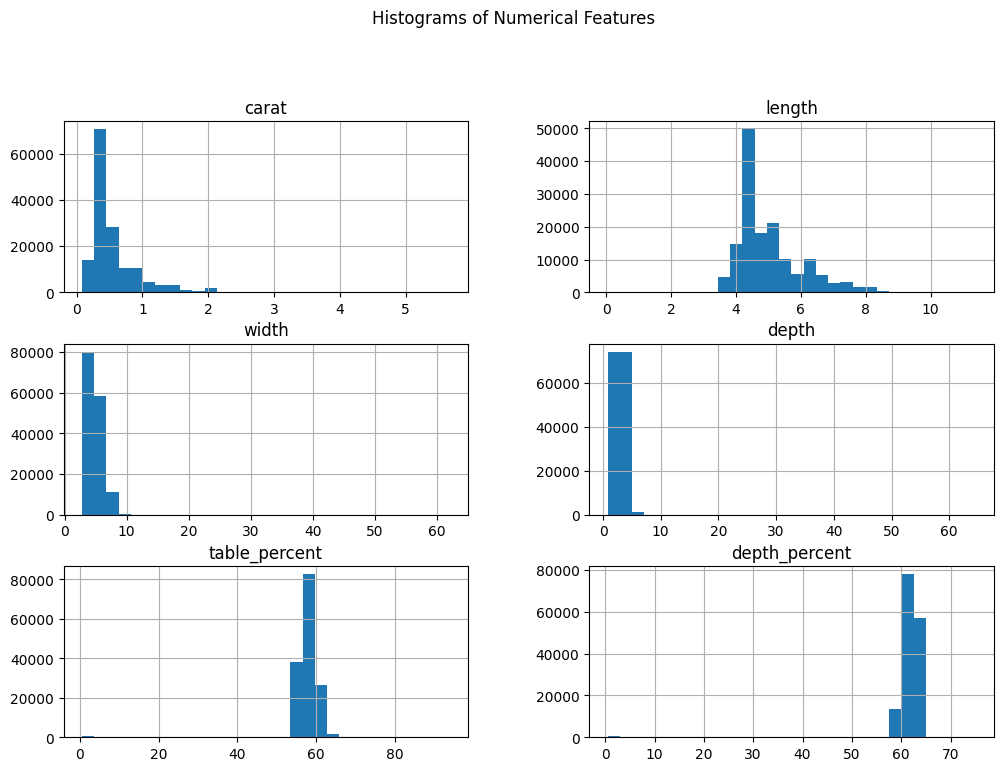

Skewness of Features:
carat             2.331773
length            1.283604
width             4.115348
depth            27.493299
table_percent   -11.046563
depth_percent   -13.559608
dtype: float64


In [46]:
from scipy.stats import boxcox

numerical_features = ['carat', 'length', 'width', 'depth', 'table_percent', 'depth_percent' ]

dataenc[numerical_features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

skewness = dataenc[numerical_features].apply(lambda x: x.skew())
print("Skewness of Features:")
print(skewness)


# Answer 1.2


Histogram for numerical features is shown above.

For features with high skewness, power transformation can be utilized to convert skewed distributions into Gaussian distributions with zero mean and unit variance. Two types of power transformations available are box-cox and yeo-johnson. Additionally, simpler transformations such as square root, reciprocal, or log transformations of the feature can be applied. Alternatively, standardization alone can be employed to achieve optimal model performance. The decision has been made to solely utilize standardization.

<Figure size 800x600 with 0 Axes>

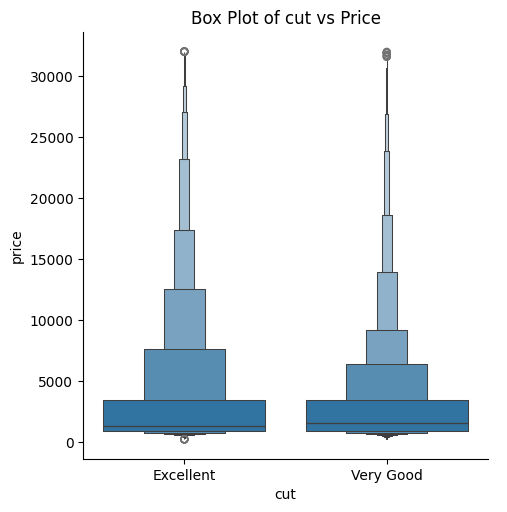

<Figure size 800x600 with 0 Axes>

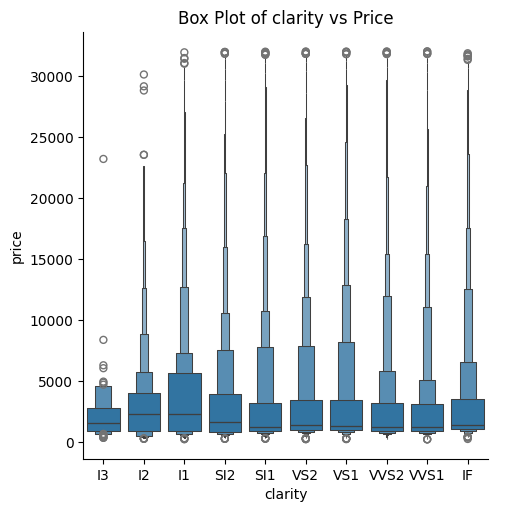

<Figure size 800x600 with 0 Axes>

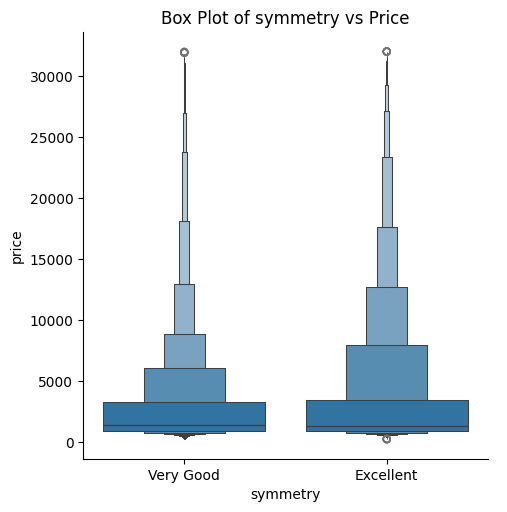

<Figure size 800x600 with 0 Axes>

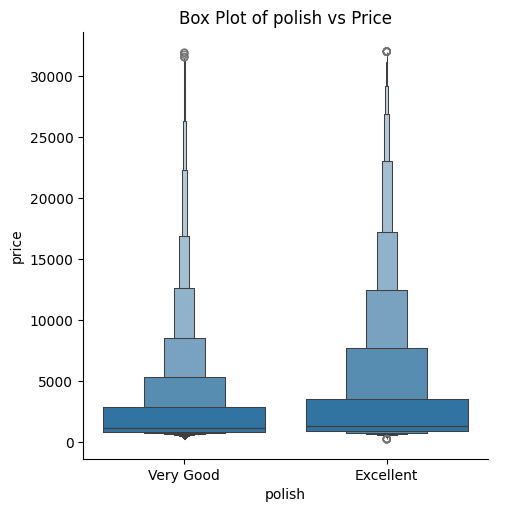

<Figure size 800x600 with 0 Axes>

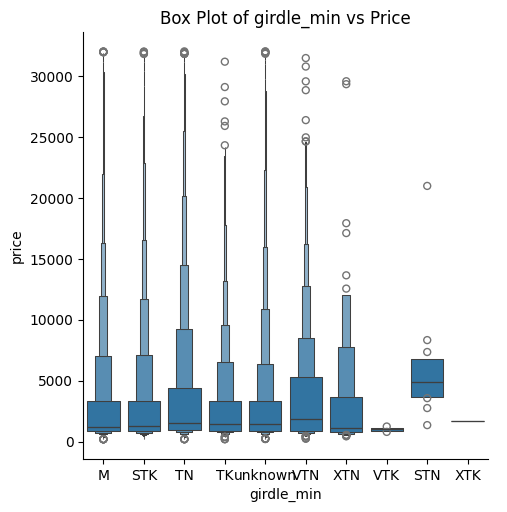

<Figure size 800x600 with 0 Axes>

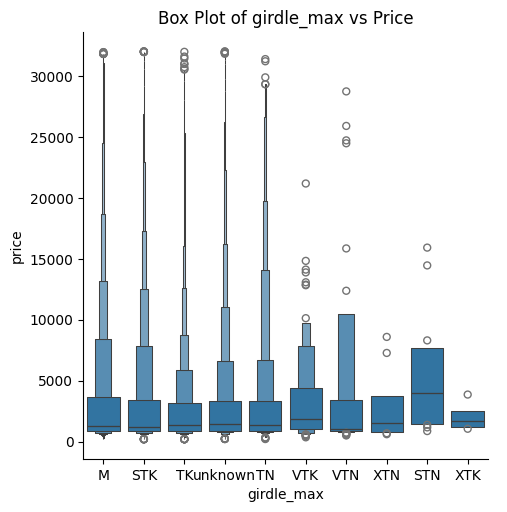

<Figure size 800x600 with 0 Axes>

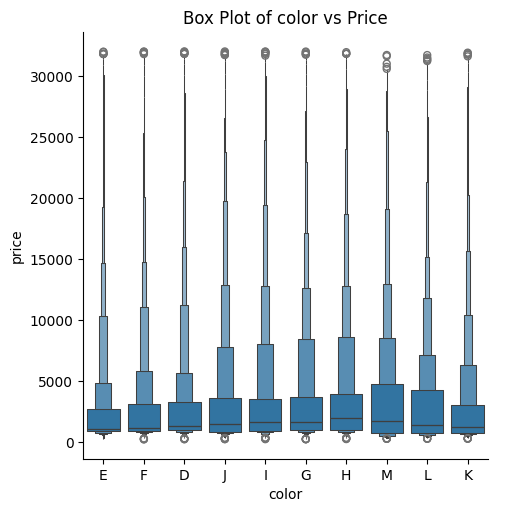

In [ ]:
categorical_features = ['cut', 'clarity', 'symmetry', 'polish', 'girdle_min', 'girdle_max', 'color']

figure_size = (8, 6)  # Adjust the overall figure size

for i, feature in enumerate(categorical_features, 1):
    plt.figure(figsize=figure_size)
    if feature == 'clarity':
      sns.catplot(x=feature, y='price', data=data,kind='boxen',order =clarity_ranking.keys())
    else :
      sns.catplot(x=feature, y='price', data=data,kind='boxen')
    plt.title(f'Box Plot of {feature} vs Price')
    plt.show()


# Answer 1.3

The plots are as shown above. It is apparent that higher cut quality is associated with higher prices. Conversely, there is a negative correlation between price and color, indicating that prices decrease as color improves. Regarding clarity, prices increase from I1 to VS1 but decrease between VS1 and IF. Subsequent analysis has revealed that categorical features are less effective for regression performance compared to numerical features.






# Plotting counts by color, cut and clarity

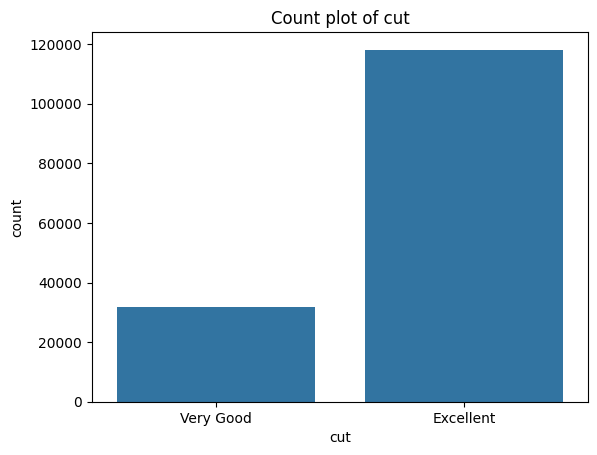

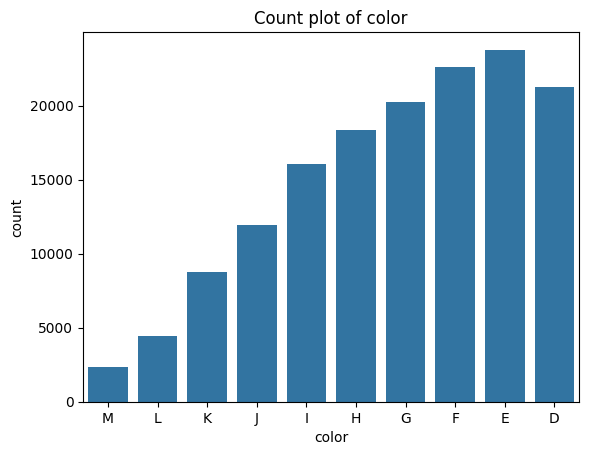

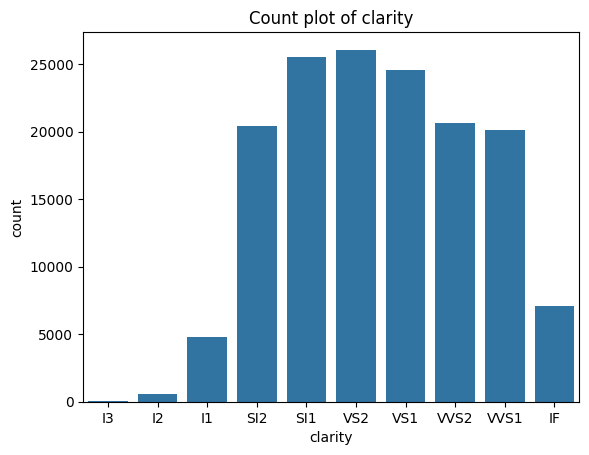

In [47]:

plt.figure()
sns.countplot(x=data["cut"],order = cat2num.keys())
plt.title("Count plot of cut")

plt.figure()
sns.countplot(x=data["color"],order = color_dict.keys())
plt.title("Count plot of color")

plt.figure()
sns.countplot(x=data["clarity"],order = clarity_ranking.keys())
plt.title("Count plot of clarity")
plt.show()


# Answer 1.4

The plots are as shown above.

# Standardize data (Answer 2.1)

We standardize columns as shown below. Note that categorical features have been ordinally encoded in previous cells and stored in dataframe 'dataenc'

In [12]:
feats = dataenc.loc[:, dataenc.columns != 'price'].to_numpy()
target = dataenc.price
scaler = StandardScaler()
feats_scaled = scaler.fit_transform(feats)


# Linear + Ridge + Lasso Regression

In [ ]:
diamonds_RMSE_MIR = []
diamonds_RMSE_FR = []


diamonds_RMSE_MIR_LR= []
diamonds_RMSE_FR_LR = []

diamonds_RMSE_MIR_RR= []
diamonds_RMSE_FR_RR = []


for i in range(1,feats.shape[1]):
    print('Testing LinReg, diamonds dataset for k = ', i)
    feats_M = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(feats, target)
    feats_F = SelectKBest(score_func=f_regression, k=i).fit_transform(feats, target)

    diamOut = cross_validate(LinearRegression(), feats_M, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_MIR.append(diamOut['test_neg_root_mean_squared_error'].mean())

    diamout = cross_validate(LinearRegression(), feats_F, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_FR.append(diamOut['test_neg_root_mean_squared_error'].mean())

    print('Testing RidgeReg, diamonds dataset for k = ', i)
    diamOut = cross_validate(Ridge(), feats_M, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_MIR_RR.append(diamOut['test_neg_root_mean_squared_error'].mean())
    diamOut = cross_validate(Ridge(), feats_F, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_FR_RR.append(diamOut['test_neg_root_mean_squared_error'].mean())

    print('Testing LassoReg, diamonds dataset for k = ', i)
    diamOut = cross_validate(Lasso(), feats_M, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_MIR_LR.append(diamOut['test_neg_root_mean_squared_error'].mean())
    diamOut = cross_validate(Lasso(), feats_F, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    diamonds_RMSE_FR_LR.append(diamOut['test_neg_root_mean_squared_error'].mean())


Testing LinReg, diamonds dataset for k =  1
Testing RidgeReg, diamonds dataset for k =  1
Testing LassoReg, diamonds dataset for k =  1
Testing LinReg, diamonds dataset for k =  2
Testing RidgeReg, diamonds dataset for k =  2
Testing LassoReg, diamonds dataset for k =  2
Testing LinReg, diamonds dataset for k =  3
Testing RidgeReg, diamonds dataset for k =  3
Testing LassoReg, diamonds dataset for k =  3
Testing LinReg, diamonds dataset for k =  4
Testing RidgeReg, diamonds dataset for k =  4
Testing LassoReg, diamonds dataset for k =  4
Testing LinReg, diamonds dataset for k =  5
Testing RidgeReg, diamonds dataset for k =  5
Testing LassoReg, diamonds dataset for k =  5
Testing LinReg, diamonds dataset for k =  6
Testing RidgeReg, diamonds dataset for k =  6
Testing LassoReg, diamonds dataset for k =  6
Testing LinReg, diamonds dataset for k =  7
Testing RidgeReg, diamonds dataset for k =  7
Testing LassoReg, diamonds dataset for k =  7
Testing LinReg, diamonds dataset for k =  8
Test

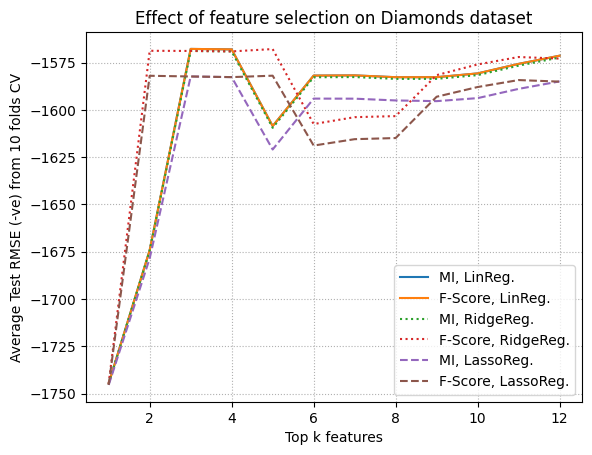

In [ ]:
plt.plot(np.arange(1,len(diamonds_RMSE_MIR)+1,1),diamonds_RMSE_MIR)
plt.plot(np.arange(1,len(diamonds_RMSE_FR)+1,1),diamonds_RMSE_FR)
plt.plot(np.arange(1,len(diamonds_RMSE_MIR_RR)+1,1),diamonds_RMSE_MIR_RR,':')
plt.plot(np.arange(1,len(diamonds_RMSE_FR_RR)+1,1),diamonds_RMSE_FR_RR,':')
plt.plot(np.arange(1,len(diamonds_RMSE_MIR_LR)+1,1),diamonds_RMSE_MIR_LR,'--')
plt.plot(np.arange(1,len(diamonds_RMSE_FR_LR)+1,1),diamonds_RMSE_FR_LR,'--')
plt.legend(['MI, LinReg.','F-Score, LinReg.','MI, RidgeReg.',
            'F-Score, RidgeReg.','MI, LassoReg.','F-Score, LassoReg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Diamonds dataset')
plt.show()


In [53]:
mut_info_selector = SelectKBest(mutual_info_regression, k = "all")
mut_info_selector.fit_transform(dataenc.loc[:, dataenc.columns != 'price'],target) # accepts row vector
print(mut_info_selector.scores_)
print('\n\n\n')
print("All names: ",mut_info_selector.feature_names_in_)
sort_idx_mi = np.argsort(mut_info_selector.scores_)[::-1]
print("Sorted names(in decreasing order): ", mut_info_selector.feature_names_in_[sort_idx_mi])


[1.37545797 0.04404253 0.02785272 1.192858   1.20586607 1.15865957
 0.02535653 0.0384929  0.02459617 0.0231724  0.01211    0.182262
 0.16630678]




All names:  ['carat' 'depth_percent' 'table_percent' 'length' 'width' 'depth'
 'girdle_min_enc' 'girdle_max_enc' 'cut_enc' 'symmetry_enc' 'polish_enc'
 'color_enc' 'clarity_enc']
Sorted names(in decreasing order):  ['carat' 'width' 'length' 'depth' 'color_enc' 'clarity_enc'
 'depth_percent' 'girdle_max_enc' 'table_percent' 'girdle_min_enc'
 'cut_enc' 'symmetry_enc' 'polish_enc']


# Answer 2.2

Mutual information (MI) and F scores functions are used to select the most important features. This
step is extremely useful as selecting just a part of input features helps in boosting the model performance
for testing, especially for linear models.

• In simpler words, this helps us avoid the problem of overfitting by not considering the less relevant or
redundant features.

• Mutual information is calculated between two variables and measures the reduction in uncertainty for
one variable given a known value of the other variable. The mutual information between two random
variables X and Y can be stated formally as follows:

$$I(X, Y ) = H(X)- H(X|Y )$$

• The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the
F1 score are equal. The formula for the F1 score is:

$$ F1 = \frac{2*Precision*Recall}{Precision + Recall}   $$


The effect of feature selection on Diamonds dataset can be seen in the plot above where the average test RMSE is plotted against top 'k' features. From the above plots, we can infer that:

• Linear, ridge, and lasso regressions exhibit increasing test scores that eventually converge at a certain threshold. This convergence is attributed to the informative nature of the top features, which sufficiently convey the necessary information. Feature selection diminishes model complexity while enhancing interpretability.

• Mutual information (MI) effectively captures non-linear relationships between features and target variables but operates at a slower pace compared to F1-score and necessitates a larger sample size.



We see that features with **Least MI wrt Price are Symmetry and Polish**.

In [13]:
k_val = 7 # Inferred from the graph above

#Unstandardized
feats_f = SelectKBest(score_func=f_regression, k=k_val).fit_transform(feats, target)
feats_mir = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(feats, target)

#Standardized
feats_fs = SelectKBest(score_func=f_regression, k=k_val).fit_transform(feats_scaled, target)
feats_mirs = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(feats_scaled, target)


# Answer 2.2 (continued)

From plot previously, we note that k=7 is ideal and we select k=7 best using F-score and MI. For most of the parts, I'll use best k=7 based on F1-score.

# Regression analyses

# Answer 4.1

- Ordinary Least Squares (OLS): $ \min_{\beta} ||Y - X\beta||_2^2 $
- Lasso: $ \min_{\beta} ||Y - X\beta||_2^2 + \lambda||\beta||_1 $
- Ridge: $ \min_{\beta} ||Y - X\beta||_2^2 + \lambda||\beta||_2^2 $


**Lasso regression** is essentially linear regression with L1 regularization. It is particularly suitable for feature selection and constructing simple and sparse regression models, where features with zero weights are discarded. This is because L1 regularization aims to shrink all weights to zero, regardless of their magnitude. L1 regularization tends to shrink weights to zero more readily than L2 regularization for similar test accuracies, as it assumes priors on weights sampled from an isotropic Laplace distribution, which has a lower Q factor compared to the Gaussian distribution. Consequently, only a subset of features remains active in the learned hypothesis.

On the other hand, **Ridge regression** is linear regression with L2 regularization. It assumes priors on weights sampled from a unit Gaussian distribution and is suitable for reducing the effects of collinear features, which can increase the model's variance. The subgradient of the norm of weights in Ridge regression depends not only on the sign but also on the magnitude of the weights. This scaling of the weight variance reduces the model's reliance on new features and encourages distributed contribution from all features. As a result, Ridge regression tends to produce regression models with diffuse weights compared to the sparse weights obtained from L1 regularization. Therefore, Ridge regression promotes the participation of all features in the learned hypothesis to prevent overfitting.

In summary, the L2 regularization term serves the purpose of shrinkage, while L1 regularization can be employed for feature selection or screening purposes.



# Linear Regression

In [ ]:
XdiamOut = cross_validate(LinearRegression(), feats_f, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('No standardization, F1, linear regression: Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())
XdiamOut = cross_validate(LinearRegression(), feats_mir, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('No standardization, MI, linear regression: Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())
XdiamOut = cross_validate(LinearRegression(), feats_fs, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('Standardization, F1, linear regression:  Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())
XdiamOut = cross_validate(LinearRegression(), feats_mirs, target, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('Standardization, MI, linear regression: Test=',XdiamOut['test_neg_root_mean_squared_error'].mean(),',Train=',XdiamOut['train_neg_root_mean_squared_error'].mean())


No standardization, F1, linear regression: Test= -1602.8617683848083 ,Train= -1653.4029604972463
No standardization, MI, linear regression: Test= -1581.7193267609136 ,Train= -1556.1352753058177
Standardization, F1, linear regression:  Test= -1602.8617683848702 ,Train= -1653.4029604972463
Standardization, MI, linear regression: Test= -1581.7193267609773 ,Train= -1556.1352753058177


# Ridge Regression

In [ ]:
pipe_RR = Pipeline([('model', Ridge(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-5,5)]
}


print("Testing Diamonds ..\n")
griddiamRR_F = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_f, target)
griddiamRR_FS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_fs, target)
griddiamRR_M = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_mir, target)
gridBikeRR_MS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_mirs, target)


Testing Diamonds ..

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(' No standardization, F1, RidgeRegression, Test RMSE:',griddiamRR_F.best_score_,
      ',alpha:',griddiamRR_F.best_params_,'train RMSE',max(griddiamRR_F.cv_results_['mean_train_score']))
print(' Standardization, F1, RidgeRegression, Test RMSE:',griddiamRR_FS.best_score_,
      ',alpha:',griddiamRR_FS.best_params_,'train RMSE',max(griddiamRR_FS.cv_results_['mean_train_score']))
print(' No standardization, MI, RidgeRegression, Test RMSE:',griddiamRR_M.best_score_,
      ',alpha:',griddiamRR_M.best_params_,'train RMSE',max(griddiamRR_M.cv_results_['mean_train_score']))
print(' Standardization, MI, RidgeRegression, Test RMSE:',gridBikeRR_MS.best_score_,
      ',alpha:',gridBikeRR_MS.best_params_,'train RMSE',max(gridBikeRR_MS.cv_results_['mean_train_score']))



 No standardization, F1, RidgeRegression, Test RMSE: -1602.8617779660865 ,alpha: {'model__alpha': 1e-05} train RMSE -1653.4029604972468
 Standardization, F1, RidgeRegression, Test RMSE: -1602.861769981662 ,alpha: {'model__alpha': 1e-05} train RMSE -1653.4029604972463
 No standardization, MI, RidgeRegression, Test RMSE: -1581.7193357158208 ,alpha: {'model__alpha': 1e-05} train RMSE -1556.1352753058177
 Standardization, MI, RidgeRegression, Test RMSE: -1581.7193281640834 ,alpha: {'model__alpha': 1e-05} train RMSE -1556.1352753058177


# Lasso Regression

In [ ]:
pipe_LAR = Pipeline([('model', Lasso(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-5,5)]
}


print("Testing Diamond ..\n")
griddiamLAR_F = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_f, target)
griddiamLAR_FS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_fs, target)
griddiamLAR_M = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_mir, target)
griddiamLAR_MS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_mirs, target)

print('No standardization, F1, LassoRegression, Test RMSE:',griddiamLAR_F.best_score_,
      ',alpha:',griddiamLAR_F.best_params_,'train RMSE',max(griddiamLAR_F.cv_results_['mean_train_score']))
print('Standardization, F1, LassoRegression, Test RMSE:',griddiamLAR_FS.best_score_,
      ',alpha:',griddiamLAR_FS.best_params_,'train RMSE',max(griddiamLAR_FS.cv_results_['mean_train_score']))
print('No standardization, MI, LassoRegression, Test RMSE:',griddiamLAR_M.best_score_,
      ',alpha:',griddiamLAR_M.best_params_,'train RMSE',max(griddiamLAR_M.cv_results_['mean_train_score']))
print('Standardization, MI, LassoRegression, Test RMSE:',griddiamLAR_MS.best_score_,
      ',alpha:',griddiamLAR_MS.best_params_,'train RMSE',max(griddiamLAR_MS.cv_results_['mean_train_score']))



Testing Diamond ..

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
No standardization, F1, LassoRegression, Test RMSE: -1602.861957239226 ,alpha: {'model__alpha': 1e-05} train RMSE -1653.4029604972607
Standardization, F1, LassoRegression, Test RMSE: -1602.861866591929 ,alpha: {'model__alpha': 1e-05} train RMSE -1653.4029604972511
No standardization, MI, LassoRegression, Test RMSE: -1581.5851091157976 ,alpha: {'model__alpha': 0.01} train RMSE -1556.1352753058316
Standardization, MI, LassoRegression, Test RMSE: -1581.5569809806207 ,alpha: {'model__alpha': 0.1} train RMSE -1556.1352753058222


# Answer 4.2

For this question, we analyze the performance of train and test RMSE of linear regression, Lasso regression, and Ridge regression on the top 6 selected features from the diamonds dataset and top 10 features from the gas emission dataset.

To compute the optimal penalty parameter for each regularization scheme as well as test the performance of the model, we construct a pipeline scheme by performing a grid search with 10-fold cross-validation with $\lambda$ in the range of $[10^{-5}, 10^{5}]$. We also used LassoCV and GridCV() to calculate the optimal penalty terms. We further explored the effects of feature scaling/standardization that is explained in the next question.


The results are explained in below table:

| Standardization | Feature Selection | Regression Model | Test RMSE | Train RMSE | Alpha Value |
|-----------------|-------------------|------------------|-----------|------------|-------------|
| No              | F1                | Linear           | -1602.8618| -1653.4030 | N/A         |
| No              | MI                | Linear           | -1581.7193| -1556.1353 | N/A         |
| Standardization | F1                | Linear           | -1602.8618| -1653.4030 | N/A         |
| Standardization | MI                | Linear           | -1581.7193| -1556.1353 | N/A         |
| No              | F1                | Ridge            | -1602.8618| -1653.4030 | 1e-05       |
| Standardization | F1                | Ridge            | -1602.8620| -1653.4030 | 1e-05       |
| No              | MI                | Ridge            | -1581.7193| -1556.1353 | 1e-05       |
| Standardization | MI                | Ridge            | -1581.7193| -1556.1353 | 1e-05       |
| No              | F1                | Lasso            | -1602.8620| -1653.4030 | 1e-05       |
| Standardization | F1                | Lasso            | -1602.8619| -1653.4030 | 1e-05       |
| No              | MI                | Lasso            | -1581.5851| -1556.1353 | 0.01        |
| Standardization | MI                | Lasso            | -1581.5570| -1556.1353 | 0.1         |










# Answer 4.3


From the analysis presented in above table, it's evident that feature scaling influences the RMSE when regularization is applied, as evidenced by the optimal RMSE achieved.

Feature scaling preserves the original distribution of the dataset. In the absence of regularization, any alterations in values due to feature scaling would be reflected in the model's weights to minimize RMSE. However, since the data distribution remains unchanged, the impact of feature scaling on the coefficients would be linear, resulting in no discernible performance improvements or deteriorations in test RMSE without regularization.

As discussed in Question 1.2, standardizing data helps address distribution skewness. Consider two prominent features, one with a significantly smaller range and magnitude compared to the other. Without normalization, the model may assign disproportionately larger coefficients to the smaller feature to maintain balance with the larger one. However, when regularization is applied, it may penalize or remove the coefficients of the smaller feature, while minimally affecting those of the larger feature. Feature scaling ensures that regularization does not unduly penalize smaller features, leading to more robust and well-conditioned models.


# p-Value

In [ ]:
p_ex = OLS(target, dataenc.loc[:, dataenc.columns != 'price']).fit()
print(p_ex.pvalues.sort_values(ascending=True))


carat             0.000000e+00
depth_percent     0.000000e+00
length            0.000000e+00
color_enc         0.000000e+00
clarity_enc       0.000000e+00
cut_enc           4.225408e-60
girdle_max_enc    4.927433e-44
table_percent     8.403301e-40
girdle_min_enc    3.542865e-30
symmetry_enc      9.821138e-07
depth             5.303614e-03
width             6.645046e-03
polish_enc        3.640656e-02
dtype: float64


# Answer 4.4

The p-value for each feature tests the null hypothesis that the feature has no correlation with the target
variable i.e, P-values in the linear regression model measures the probability of feature coefficients being
equal to zero. Hence, if the p-value for some feature is very close to 0, we will have the confidence to say
that particular feature is significant in the linear model.
For the diamond dataset, the p- values were as follows:

| Feature         | p-value           |
|-----------------|-------------------|
| carat           | 0.000000e+00      |
| depth_percent   | 0.000000e+00      |
| length          | 0.000000e+00      |
| color_enc       | 0.000000e+00      |
| clarity_enc     | 0.000000e+00      |
| cut_enc         | 4.225408e-60      |
| girdle_max_enc | 4.927433e-44      |
| table_percent   | 8.403301e-40      |
| girdle_min_enc | 3.542865e-30      |
| symmetry_enc    | 9.821138e-07      |
| depth           | 5.303614e-03      |
| width           | 6.645046e-03      |
| polish_enc      | 3.640656e-02      |


# Polynomial Regression

In [ ]:
degree_list = np.arange(1,5,1)
pipe_PR_diam = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])
param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [10.0**x for x in np.arange(-4,5)]

}

polyreg_gs = GridSearchCV(pipe_PR_diam, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1,
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_fs,target)



Fitting 10 folds for each of 36 candidates, totalling 360 fits


<ipython-input-12-6ac521358339>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diam_alpha.append(float(poly_result['param_model__alpha'][
<ipython-input-12-6ac521358339>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diam_alpha.append(float(poly_result['param_model__alpha'][
<ipython-input-12-6ac521358339>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diam_alpha.append(float(poly_result['param_model__alpha'][
<ipython-input-12-6ac521358339>:8: DeprecationWar

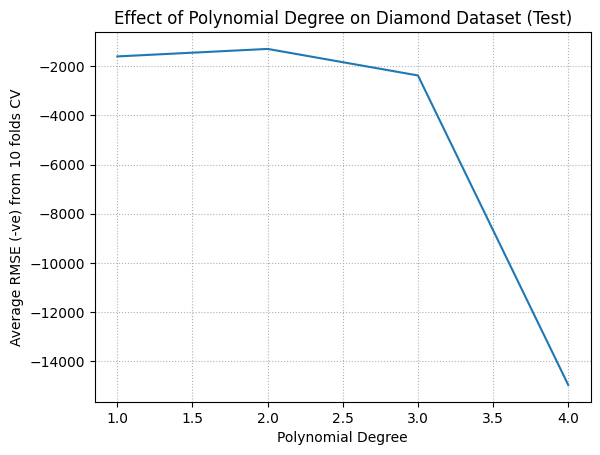

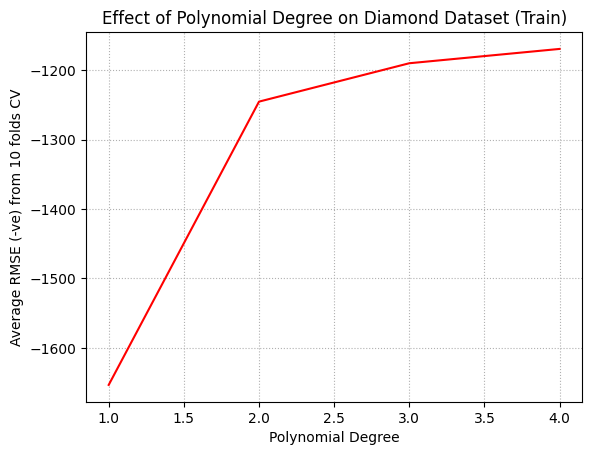

In [ ]:

poly_result = pd.DataFrame(polyreg_gs.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
diam_score = []
diam_train = []
diam_alpha = []
for i in degree_list:
    diam_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    diam_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    diam_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,diam_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Test Dataset')
plt.show()
plt.plot(degree_list,diam_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Train Dataset')
plt.show()


# Salient features

In [ ]:
chY = SelectKBest(score_func=f_regression, k=7)
XTranscode_Test = chY.fit_transform(dataenc.loc[:, dataenc.columns != 'price'], dataenc.price)
column_names = dataenc.loc[:, dataenc.columns != 'price'].columns[chY.get_support()]

b_params = polyreg_gs.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names_out(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features :',salient_features)


Top 5 Salient features : ['width', 'length', 'carat', 'carat color_enc', 'length^2']


# Answer 5.1

The most salient features are those with greatest absolute coefficients. We performed a gridsearch with
10-fold cross validation on each dataset to find these values
For the diamonds dataset, the top 5 salient features are: ['width', 'length', 'carat', 'carat color_enc', 'length^2']

which makes sense with the correlation map of features with target variable price with carat features occupying the most salient features.



# Answer 5.2

- Performance in terms of train and test RMSE of polynomial regression models with various degrees was assessed on the top 7 selected features from the diamonds dataset using F1-Score.

- Ridge regression with L2 regularization was employed to mitigate overfitting, with the penalty parameter optimized through grid search with 10-fold cross-validation.

- For the diamonds dataset, the optimal polynomial degree was determined to be 2, characterized by the lowest test RMSE, indicating minimal overfitting risk.

- Unconstrained increases in polynomial degree can lead to exponential growth in parameters, causing computational bottlenecks. Moreover, higher degrees may introduce excessive complexity and overfitting due to increased feature combinations.

- This pattern was consistent across both datasets, with test RMSE rising as polynomial degree increased.

# Neural network

In [ ]:

pipe_NN = Pipeline([
    ('model', MLPRegressor(random_state=42,max_iter=1000, verbose = True,alpha = 0.007,activation = 'relu',early_stopping = True))
])

param_grid_NN = {
    'model__hidden_layer_sizes': [(50,), (30,20)],
    # 'model__alpha': [5*10.0**x for x in np.arange(-2,0)],
    # 'model__activation': ['logistic', 'relu']
}


In [ ]:
griddiam_NN = GridSearchCV(pipe_NN, param_grid=param_grid_NN, cv=10, n_jobs=-1, verbose=10,
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_fs, target)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Iteration 1, loss = 16413756.83762271
Validation score: -0.441311
Iteration 2, loss = 15206423.85166683
Validation score: -0.284877
Iteration 3, loss = 13142687.32267415
Validation score: -0.078803
Iteration 4, loss = 10766284.90304198
Validation score: 0.137970
Iteration 5, loss = 8449895.94200918
Validation score: 0.337322
Iteration 6, loss = 6421941.14511140
Validation score: 0.505152
Iteration 7, loss = 4790081.90786373
Validation score: 0.636082
Iteration 8, loss = 3575024.23562442
Validation score: 0.729588
Iteration 9, loss = 2749403.75111931
Validation score: 0.790165
Iteration 10, loss = 2244458.62964041
Validation score: 0.825365
Iteration 11, loss = 1953165.00409470
Validation score: 0.845368
Iteration 12, loss = 1777408.73379939
Validation score: 0.857622
Iteration 13, loss = 1657844.78726404
Validation score: 0.866212
Iteration 14, loss = 1565357.23365779
Validation score: 0.872825
Iteration 15, loss = 1490110.29

In [ ]:
print('Test RMSE:', griddiam_NN.best_score_,
      ', \nBest Parameters:', griddiam_NN.best_params_,
      ', \nTrain RMSE:', max(griddiam_NN.cv_results_['mean_train_score']))


Test RMSE: -1316.730587329082 , 
Best Parameters: {'model__hidden_layer_sizes': (50,)} , 
Train RMSE: -1201.6367771719893


# Answer 6.1

Grid-search for Neural network is implemented as above. Since the network was taking too long (it took > 8 hours with no result), I could only experiment with two different model settings with 10 folds each, equalling to 20 fits overall.
Hidden layer sizes is the parameter that is experimented with, the first model being a single hidden layer network with hidden layer size = (50,) and the second being a two-hidden layer network with hidden layer size = (30,20). Activation function is set to "ReLU" and alpha (regularization parameter) is set to 0.007.

| Metric      | Value                   |
|-------------|-------------------------|
| Test RMSE   | -1316.730587329082      |
| Train RMSE  | -1201.6367771719893     |



# Answer 6.2

As seen above, the *negative test RMSE* is higher for neural networks in comparison to linear regression, which is obvious since neural networks are also able to capture non-linear complex relationships in the data in addition to linear relationships that could be captured by linear regression model variants.

# Answer 6.3

The ReLU (Rectified Linear Unit) activation function was selected for its array of advantages over the identity activation function and other alternatives:

1. Non-linearity: ReLU introduces non-linearity into the network, facilitating the learning of intricate and non-linear relationships between input and output. This enhances the network's ability to capture underlying data patterns, thereby improving predictive accuracy.

2. Sparsity: ReLU can generate sparse representations where some output values are zero while others are non-zero. This sparsity aids in reducing the network's parameter count, enhancing computational efficiency.

3. Gradient propagation: ReLU helps mitigate the vanishing gradient problem by facilitating smoother gradient propagation throughout the network. This feature contributes to easier training of deep networks and enhances overall performance.

4. Interpretability: Compared to activation functions like sigmoid or tanh, ReLU produces output values closer to the input range, making the network's behavior more interpretable. This simplifies understanding and interpretation of the network's predictions.

In contrast, the identity activation function is a linear function that merely returns the input value. When employed, additional layers in the neural network become redundant, as all layers can be condensed into a single weight vector derived from the multiplication of weight vectors. Sigmoid and tanh functions are prone to saturation at extreme values, leading to limited learning capabilities.



# Answer 6.4

Elevating the depth of a neural network past a specific threshold poses several risks, including:

1. Overfitting: Excessive complexity in a neural network may cause it to memorize training data rather than discerning general patterns applicable to new data. This phenomenon, known as overfitting, results in superior performance on training data but inferior performance on test data, particularly problematic with noisy or unrepresentative training data.

2. Vanishing gradients: Deep networks can suffer from diminutive or zero gradients during training, hindering weight updates and impeding learning. This vanishing gradient problem complicates the training process for deep networks.

3. Exploding gradients: Conversely, gradients can become excessively large, causing overly drastic weight updates during training, leading to numerical instability and hampering network training.

4. Computational complexity: Increasing network depth augments the number of parameters to be learned, heightening computational demands and slowing down the training process. This complicates scalability to larger datasets and deployment on resource-constrained devices.

5. Optimization challenges: Deeper networks pose a more intricate optimization problem, making it arduous to identify the optimal weight set that minimizes the loss function.

In essence, escalating the depth of a neural network beyond a certain threshold may yield diminishing returns or even deteriorate performance. It's crucial to strike a balance between network complexity, available data volume, and task complexity. Techniques like regularization, dropout, and batch normalization can help mitigate these risks and facilitate the training of deep neural networks.


# Random Forest Regression
















In [16]:
pipe_RF = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True,n_jobs=-1,verbose=True))
])

param_grid_RF = {
    'model__max_features': np.arange(2,5,1),
    'model__n_estimators': np.arange(1, 61, 10),
    'model__max_depth': np.arange(1, 11, 1)

}
randomforest_gs = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=10,
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(feats_fs, target)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    3.2s finished


In [17]:
rf_result = pd.DataFrame(randomforest_gs.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
print('Best parameters :',randomforest_gs.best_params_,',Test RMSE:',randomforest_gs.best_score_)
print('Train RMSE:',max(rf_result.mean_train_score))


Best parameters : {'model__max_depth': 10, 'model__max_features': 4, 'model__n_estimators': 31} ,Test RMSE: -1573.4477357508983
Train RMSE: -1070.1653334937887


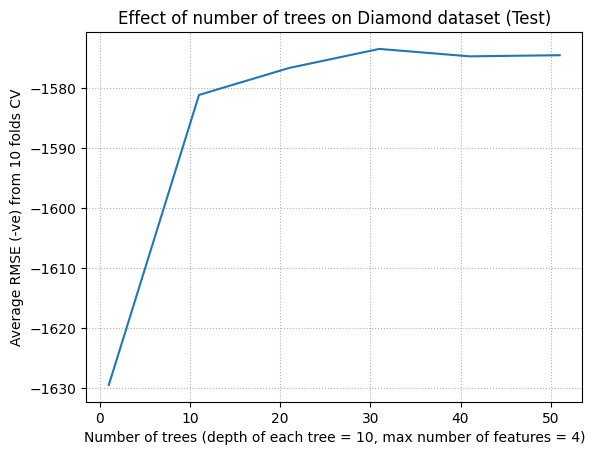

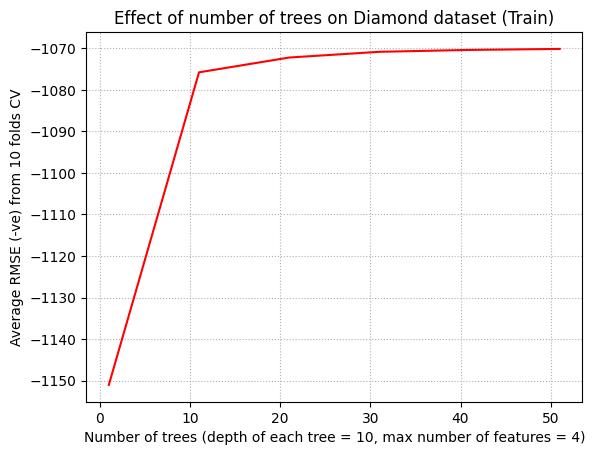

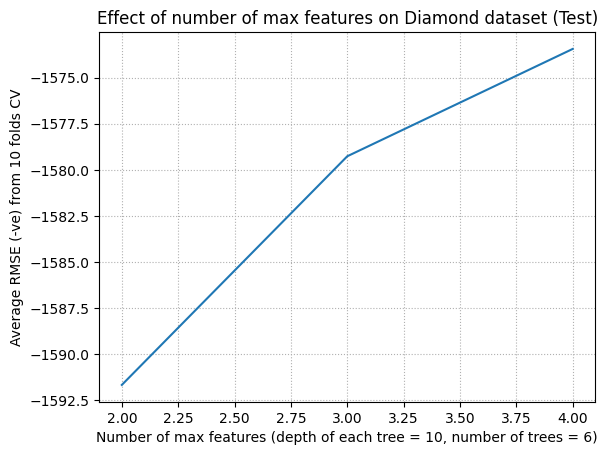

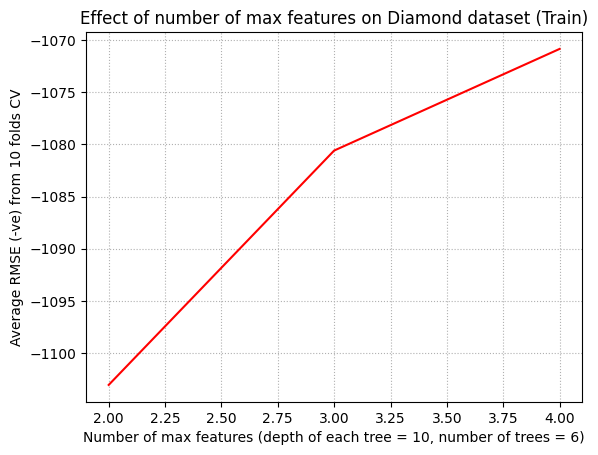

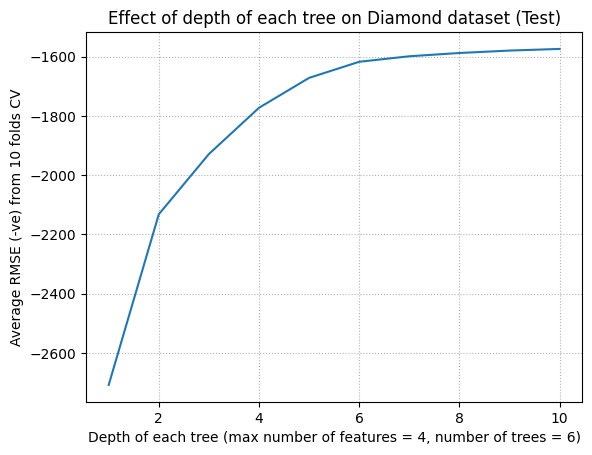

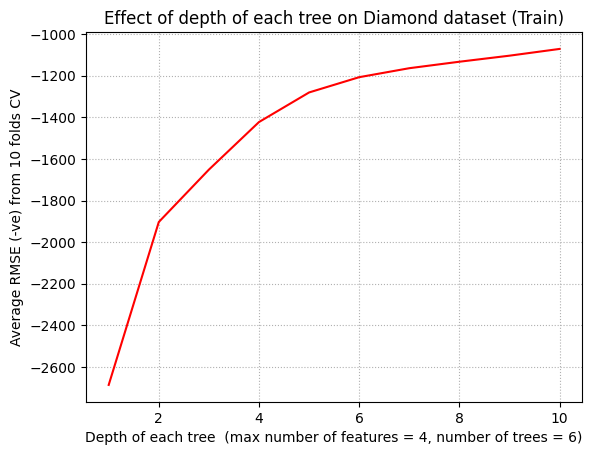

In [27]:
max_features = np.arange(2,5,1).reshape(3)
n_estimators = np.arange(1, 61, 10).reshape(6)
max_depth = np.arange(1, 11, 1).reshape(10)

diam_score = list((rf_result[(rf_result['param_model__max_depth'] == 10) & (rf_result['param_model__max_features'] == 4)]).mean_test_score)
diam_train = list((rf_result[(rf_result['param_model__max_depth'] == 10) & (rf_result['param_model__max_features'] == 4)]).mean_train_score)
plt.plot(n_estimators,diam_score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 10, max number of features = 4)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Test)')
plt.show()
plt.plot(n_estimators,diam_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 10, max number of features = 4)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Train)')
plt.show()

diam_score = list((rf_result[(rf_result['param_model__max_depth'] == 10) & (rf_result['param_model__n_estimators'] == 31)]).mean_test_score)
diam_train = list((rf_result[(rf_result['param_model__max_depth'] == 10) & (rf_result['param_model__n_estimators'] == 31)]).mean_train_score)
plt.plot(max_features,diam_score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 10, number of trees = 6)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Test)')
plt.show()
plt.plot(max_features,diam_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 10, number of trees = 6)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Train)')
plt.show()

bike_score = list((rf_result[(rf_result['param_model__max_features'] == 4) & (rf_result['param_model__n_estimators'] == 31)]).mean_test_score)
bike_train = list((rf_result[(rf_result['param_model__max_features'] == 4) & (rf_result['param_model__n_estimators'] == 31)]).mean_train_score)
plt.plot(max_depth,bike_score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 4, number of trees = 6)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Test)')
plt.show()
plt.plot(max_depth,bike_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 4, number of trees = 6)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Train)')
plt.show()


# Answer 7.1

--> **Effect of the number of trees:**
The quantity of trees in a random forest regressor can significantly influence its overall performance. Generally, increasing the number of trees can enhance the accuracy and stability of the model's predictions, up to a certain threshold. Insufficient trees may lead to high variance and overfitting, indicating that the model has memorized the training data excessively and might not generalize well to new data. Typically, boosting the number of trees improves the model's performance to a point of diminishing returns. Beyond this threshold, additional trees might not notably enhance performance but could increase computational expenses and training duration.

--> **Effect of the maximum number of features:**
The maximum number of features utilized in each split of a Random Forest Regressor also profoundly impacts the model's overall performance. On one hand, incorporating more features can enhance the model's capability to capture intricate patterns and interactions within the data. A larger feature set offers more information to the model, facilitating better discrimination between classes or improved prediction of the target variable. Moreover, a broader range of features enhances diversity among the forest's trees, potentially bolstering performance and mitigating overfitting.

Nevertheless, excessively incorporating features can lead to overfitting, where the model learns noise instead of genuine patterns in the training data. Some features might be irrelevant or redundant, augmenting the model's complexity without commensurate performance gains. Therefore, utilizing a conservative number of features can impose a regularization effect, guarding against overfitting.

--> **Effect of tree depth:**
The depth of each tree within a Random Forest Regressor significantly influences overall model performance. Deeper trees can capture intricate data relationships, resulting in enhanced accuracy and better alignment with the training data. This is because deeper trees partition the data into smaller, more homogeneous subsets, facilitating the learning of detailed patterns and feature interactions.

However, deeper trees also heighten the risk of overfitting, wherein the model learns noise instead of genuine patterns, leading to poor generalization on new data. Overfitting occurs when the model becomes excessively complex, fitting noise in the training data and resulting in high variance and suboptimal performance on unseen data.


---
• The performance of polynomial regression with various degrees on the top 6 and 10 selected features from the diamonds dataset was evaluated in terms of train and test RMSE.

• Prioritizing F1-Score over Mutual Information (MI) for feature selection, the top 6 and 10 features from F1 were chosen. Subsequently, ridge regression was applied to introduce L2 regularization and mitigate overfitting. The penalty parameter was optimized using grid search with 10-fold cross-validation.

• In pursuit of optimal hyperparameters, a hyperparameter space was defined, and a 10-fold cross-validation grid search pipeline was constructed. The hyperparameter space encompassed:

| Hyperparameter         | Range   |
|------------------------|---------|
| Maximum features       | 2-4     |
| Number of estimators   | 10-60   |
| Depth of each tree     | 1-10    |


The optimal parameters for the diamond dataset were determined as follows:

| Best Hyperparameter         | Value   |
|------------------------|---------|
| Maximum features       | 4     |
| Number of estimators   | 31      |
| Depth of each tree     | 10      |


Results for above best setting:

| Metric      | Value                  |
|-------------|------------------------|
| Test RMSE   | -1573.4477357508983    |
| Train RMSE  | -1070.1653334937887    |

## **Regularization effect**

Based on the plots above presented, it's evident that the overall model performance doesn't exhibit a consistent trend concerning the number of trees. While increasing the number of trees tends to enhance or stabilize performance, the degree of improvement varies unpredictably. When all other hyperparameters are held constant, the sole impact of the number of trees on the model's loss is a stochastic decrease. It's advisable to select a sufficiently large value for the number of trees within computational constraints, as increasing the number of trees doesn't lead to overfitting.



• Within a random forest, each tree, along with its output target variable, behaves as independent and identically distributed random variables, as per the weak law of large numbers (WLLN). This is because the trees are grown using randomization techniques on individual bootstrap subsamples, which are uncorrelated with the growth of other trees. Consequently, WLLN suggests that both the target variable and tree-decision possess finite variance, leading to the overall decision (and any other statistic) of the random forest converging towards a mean value as the number of trees approaches infinity, as per Jensen’s inequality.


• The expected error rate for a random forest ensemble exhibits a non-monotonous relationship with the number of trees. Specifically, error metrics like RMSE become noisy once a sufficient number of estimators have been employed. The convergence rate of the error rate curve is independent of the number of trees and solely relies on the distribution of the expected value of the decisions made by the trees.


• While increasing the number of trees does not lead to overfitting in accordance with WLLN, other hyperparameters may introduce unnecessary variance in the model and foster over-correlation within the ensemble, thereby compromising the independence of trees within the random forest.


Therefore, we can observe a consistent improvement in training RMSE with the increasing maximum number of features, leading to a convergence towards a mean value. However, the test RMSE initially improves but then starts to deteriorate after reaching a certain threshold. This suggests that the number of features also acts as a form of regularization, akin to the depth of the tree. Excessively large values lead to overfitting on the training set and poor generalization on the test set. This occurs because augmenting the number of features for each tree enhances individual tree capacity but also amplifies correlation between trees, disrupting the independence of trees within the random forest. Selecting a subset of features aims to mitigate this issue by reducing correlation among trees and improving generalization error rates, thereby strengthening the random forest.







# Answer 7.2

Random forests construct a complex non-linear decision boundary by amalgamating multiple decision trees, each of which employs a distinct subset of features for decision-making. Despite each decision tree applying a threshold on a single feature at each node, the collective effect of multiple trees with varied feature subsets enables the capture of intricate non-linear relationships among features.

In random forests, individual decision trees are trained on randomized subsets of both the training data and available features. This randomness serves to mitigate overfitting and enhance the diversity among the trees in the forest.

During training, each decision tree recursively partitions the data into smaller subsets based on the values of selected features at each node. By leveraging diverse feature subsets, the trees in the forest can capture various facets of the underlying relationship between input features and the target variable. The final prediction of the random forest is then derived by aggregating the predictions of all individual trees.

The ensemble of multiple decision trees with differing feature subsets facilitates the creation of a highly non-linear decision boundary, notwithstanding each tree's reliance on a single feature threshold at each node. This versatility arises from the combined utilization of diverse thresholds on different features, enabling the model to encapsulate complex interactions among the features and accurately represent non-linear relationships between input features and the target variable.

# Tree visualization

In [12]:
vis_tree = RandomForestRegressor(random_state=42,max_depth=4, max_features=3, n_estimators=10).fit(feats_fs,target)


In [15]:
chY = SelectKBest(score_func=f_regression, k=7)
XTranscode_Test = chY.fit_transform(dataenc.loc[:, dataenc.columns != 'price'], dataenc["price"])
column_names = dataenc.loc[:, dataenc.columns != 'price'].columns[chY.get_support()]



In [ ]:
import pydot
from IPython.display import Image
import graphviz
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = column_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())


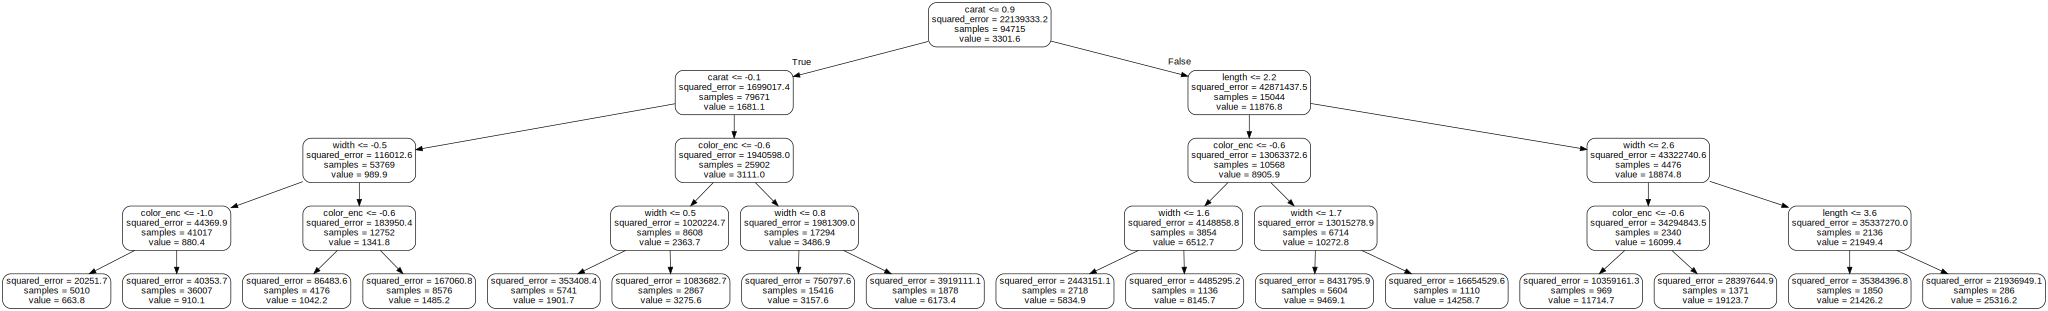

In [20]:
graphviz.Source.from_file('tree.dot')


# Answer 7.3

For the diamond dataset, from branching at the root node in the above figure, "price" is selected. This means that feature is the most important feature used to start the splitting process. In a decision tree, the features closer to the root node are more salient and significant than the features near the leaf nodes. The root node is carat as expected.
Carat feature has the most descriptive statistics for the price as it was seen from MI and F score. From the tree we can see
that the mostly used features for division are carat, length, width and color.


--> It can be concluded that the most important features in both datasets align closely with those whose p-values were deemed significant in linear regression analyses conducted previously. This observation suggests a substantial overlap between the most influential features identified based on p-values in linear regression and those determined through random decision trees within the random forest, particularly for the diamonds dataset.



# Answer 7.4 Out of Bag error

In [14]:
print('OOB = :',RandomForestRegressor(random_state=42,max_depth=10,
                                         max_features=4, n_estimators=31, oob_score=True).fit(feats_fs,target).oob_score_)


OOB = : 0.9363356357319846


**OOB Score = 0.9363** as shown above.


**OOB Score**: In Random Forest Regression, the Out-of-Bag (OOB) score serves as an estimate of the model's predictive accuracy, computed using samples excluded from the training process. This method involves constructing multiple decision trees by randomly selecting subsets of features and observations, aggregating their predictions to generate a final output. During tree construction, a random subset of observations is utilized for training each tree, while the remaining samples constitute the OOB set for evaluating model performance.

The OOB samples are exclusively used for assessment and not for training any decision tree. Therefore, each OOB sample can be predicted using the corresponding decision trees, enabling a comparison with the actual values. Averaging the prediction errors across all OOB samples provides an estimate of the model's generalization performance, known as the OOB score.

This metric is valuable for evaluating model performance and fine-tuning parameters, as it leverages samples not involved in training, offering a more dependable estimate of predictive accuracy on unseen data compared to conventional cross-validation methods.


**R2 Score**:
R2, or the coefficient of determination, is a widely-used statistical metric in regression analysis, indicating the goodness of fit of a regression model to the data. R2 ranges from 0 to 1, representing the proportion of variance in the dependent variable explained by the independent variables. A value of 0 indicates the model explains none of the variability, while 1 indicates it explains all variability.

R2 provides a standardized scale for model performance and is inversely correlated with RMSE. When RMSE is 0, R2 is 1, indicating perfect fit. Conversely, negative values indicate poorer than average performance. In the case of random forests, the OOB scoring leverages R2 to assess model performance without additional data.






# LightGBM

In [30]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [31]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

import lightgbm as lgb

import random
np.random.seed(42)
random.seed(42)


In [32]:
feats_fs_train, feats_fs_test, target_train, target_test = train_test_split(feats_fs, target, test_size=0.1, random_state=42)


In [33]:
pipe = Pipeline([
    ('model', lgb.LGBMRegressor(random_state=42))
])

lgb_search = {
    'model': Categorical([lgb.LGBMRegressor(random_state=42)]),
    'model__learning_rate': Real(0.00001, 0.9, prior='log-uniform'),
    'model__max_depth': Integer(-1,500),
    'model__num_iterations': Integer(2, 500),
    'model__num_leaves': Integer(5,500),
    'model__colsample_bytree': Real(0.05, 1.0, 'uniform'),
    'model__subsample': Real(0.05, 1.0, 'uniform'),
    'model__reg_lambda': Real(1e-8, 1e+3, 'log-uniform'),
    'model__reg_alpha': Real(1e-8, 1e+3, 'log-uniform'),
    'model__n_estimators': Integer(5,500),
    'model__min_data_in_leaf': Integer(2,200)
}

opt = BayesSearchCV(
    pipe,
    [(lgb_search)],
    cv=KFold(n_splits=10,shuffle = True, random_state = 42),
    scoring=('neg_root_mean_squared_error'),
    verbose=10,
    return_train_score=True,
    iid=False,
    n_jobs=-1
)


/usr/local/lib/python3.10/dist-packages/skopt/searchcv.py:334: UserWarning: The `iid` parameter has been deprecated and will be ignored.
  warnings.warn(


# Answer 8.1

Learning Rate (learning_rate): This parameter determines the rate at which the LightGBM model learns during training.

Max. Depth (max_depth): It specifies the maximum depth that each decision tree within the model can reach. Values of 0 or -1 indicate no depth limit.

No. of Iterations (num_iterations): This indicates the number of boosting iterations or training cycles.

No. of Leaves (num_leaves): It defines the maximum number of leaves allowed for each decision tree.

Subsample Ratio of Features (colsample_bytree): This parameter controls the ratio of features (columns) sampled for each tree during training.

Subsample Ratio of Training Instance (subsample): It determines the ratio of training instances sampled for each iteration.

L1 Regularization Term (reg_lambda): This term introduces L1 regularization to penalize weights in the objective function.

L2 Regularization Term (reg_alpha): This term introduces L2 regularization to penalize weights in the objective function.

No. of Estimators (n_estimators): It specifies the number of boosting trees to be fitted in the model.

Min. Data in Leaf (min_data_in_leaf): This sets the minimum number of observations required for a node to be added to the decision tree.





--> Note that the hyperparameter search space is as shown:

| Hyperparameter            | Range                    |
|---------------------------|--------------------------|
| model                     | Categorical              |
| model__learning_rate      | Real(0.00001, 0.9)       |
| model__max_depth          | Integer(-1, 500)         |
| model__num_iterations     | Integer(2, 500)          |
| model__num_leaves         | Integer(5, 500)          |
| model__colsample_bytree   | Real(0.05, 1.0)          |
| model__subsample          | Real(0.05, 1.0)          |
| model__reg_lambda         | Real(1e-8, 1e+3)         |
| model__reg_alpha          | Real(1e-8, 1e+3)         |
| model__n_estimators       | Integer(5, 500)          |
| model__min_data_in_leaf   | Integer(2, 200)          |


In [ ]:
opt.fit(feats_fs_train, target_train)


In [35]:
import joblib
joblib.dump(opt, 'rf_bayes_search.pkl')
bayes_search = joblib.load('rf_bayes_search.pkl')
df_b = pd.DataFrame(bayes_search.cv_results_)
sorted_b = df_b.sort_values(by='rank_test_score', ascending=True)
sorted_b.iloc[:10]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__colsample_bytree,param_model__learning_rate,param_model__max_depth,param_model__min_data_in_leaf,param_model__n_estimators,...,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score,rank_train_score
24,5.958891,0.661478,0.903919,0.167350,LGBMRegressor(learning_rate=0.1024916400047666...,1.0,0.102492,10,10,5,...,-1110.375330,-1116.487274,-1124.469022,-1112.309462,-1115.445281,-1117.577617,-1117.787421,-1117.655301,4.713164,19
11,3.123369,0.588430,0.275703,0.072837,LGBMRegressor(learning_rate=0.1024916400047666...,0.879547,0.052759,109,111,104,...,-1125.511904,-1130.363640,-1139.130099,-1125.821516,-1132.587586,-1126.098021,-1133.406859,-1132.080159,5.280954,26
9,3.300038,0.376784,0.277451,0.063314,LGBMRegressor(learning_rate=0.1024916400047666...,0.826939,0.047043,127,117,141,...,-1120.434846,-1126.401159,-1134.565206,-1122.715205,-1128.609913,-1120.834117,-1128.468960,-1127.623113,5.352506,21
44,3.163803,0.555316,0.258982,0.046034,LGBMRegressor(learning_rate=0.1024916400047666...,0.852655,0.051733,159,122,228,...,-1122.629876,-1127.923224,-1137.127014,-1123.661539,-1130.373213,-1123.329878,-1130.860256,-1129.603976,5.468508,24
29,4.672231,1.338226,0.425339,0.104324,LGBMRegressor(learning_rate=0.1024916400047666...,0.771443,0.062307,249,114,149,...,-1131.216697,-1136.813735,-1143.561501,-1131.799533,-1138.705021,-1131.490607,-1139.964111,-1137.642968,5.110901,27
43,3.371541,0.088237,0.349363,0.060690,LGBMRegressor(learning_rate=0.1024916400047666...,0.725213,0.056743,172,148,312,...,-1120.606516,-1126.997001,-1134.632683,-1122.175004,-1128.817776,-1121.426402,-1128.935645,-1127.747496,5.198474,22
34,2.942527,0.504418,0.262924,0.056317,LGBMRegressor(learning_rate=0.1024916400047666...,0.734111,0.057472,239,101,248,...,-1115.348329,-1122.364319,-1130.421354,-1117.872106,-1124.078694,-1116.451741,-1123.463000,-1122.902424,5.238978,20
20,3.643166,1.056137,0.344657,0.084514,LGBMRegressor(learning_rate=0.1024916400047666...,0.630888,0.068432,166,142,303,...,-1121.514129,-1128.293089,-1136.281453,-1122.266154,-1130.299800,-1123.164943,-1130.554613,-1129.120764,5.556228,23
49,8.165066,0.710763,1.221800,0.237543,LGBMRegressor(learning_rate=0.1024916400047666...,1.0,0.118024,-1,200,487,...,-1142.048066,-1147.119412,-1156.859766,-1143.161621,-1151.221253,-1141.996977,-1150.931668,-1149.073058,5.691746,31
27,15.568985,3.628823,2.606781,0.047594,LGBMRegressor(learning_rate=0.1024916400047666...,1.0,0.091372,32,13,5,...,-1076.590380,-1082.107104,-1090.842450,-1077.654636,-1083.220642,-1078.969451,-1084.375484,-1083.423545,4.980128,16


In [36]:
preds = opt.predict(feats_fs_test)
r2 = r2_score(target_test, preds)
rmse = mean_squared_error(target_test, preds, squared=False)
print("Train RMSE for best model: " , -sorted_b.iloc[0, -3])
print("Best Avg. Val. RMSE: ", -opt.best_score_)
print("Test RMSE: " , rmse)
print("Test R2: " ,r2)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Train RMSE for best model:  1117.6553011733251
Best Avg. Val. RMSE:  1178.2321468577388
Test RMSE:  1182.5691497796877
Test R2:  0.9366571654669723


In [37]:
opt.best_params_


OrderedDict([('model',
              LGBMRegressor(learning_rate=0.10249164000476667, max_depth=10,
                            min_data_in_leaf=10, n_estimators=5, num_iterations=400,
                            num_leaves=353, random_state=42, reg_alpha=1000.0,
                            reg_lambda=677.5730894730251, subsample=0.752794294518232)),
             ('model__colsample_bytree', 1.0),
             ('model__learning_rate', 0.10249164000476667),
             ('model__max_depth', 10),
             ('model__min_data_in_leaf', 10),
             ('model__n_estimators', 5),
             ('model__num_iterations', 400),
             ('model__num_leaves', 353),
             ('model__reg_alpha', 1000.0),
             ('model__reg_lambda', 677.5730894730251),
             ('model__subsample', 0.752794294518232)])

# Answer 8.2

Search results:

| Metric                | Value                 |
|-----------------------|-----------------------|
| Train RMSE            | 1117.6553011733251    |
| Best Avg. Val. RMSE   | 1178.2321468577388    |
| Test RMSE             | 1182.5691497796877    |
| Test R2               | 0.9366571654669723    |



The below table shows the optimal values of hyperparameters from the best model.




| Best Hyperparameter found               | Value                   |
|----------------------------|-------------------------|
| learning_rate              | 0.10249164000476667     |
| max_depth                  | 10                      |
| min_data_in_leaf           | 10                      |
| n_estimators               | 5                       |
| num_iterations             | 400                     |
| num_leaves                 | 353                     |
| reg_alpha                  | 1000.0                  |
| reg_lambda                 | 677.5730894730251       |
| subsample                  | 0.752794294518232       |
| colsample_bytree (model)   | 1.0                     |
| learning_rate (model)      | 0.10249164000476667     |
| max_depth (model)          | 10                      |
| min_data_in_leaf (model)   | 10                      |
| n_estimators (model)       | 5                       |
| num_iterations (model)     | 400                     |
| num_leaves (model)         | 353                     |
| reg_alpha (model)          | 1000.0                  |
| reg_lambda (model)         | 677.5730894730251       |
| subsample (model)          | 0.752794294518232       |


# Answer 8.3

Explanations are given in cell outputs as below.

<Axes: >

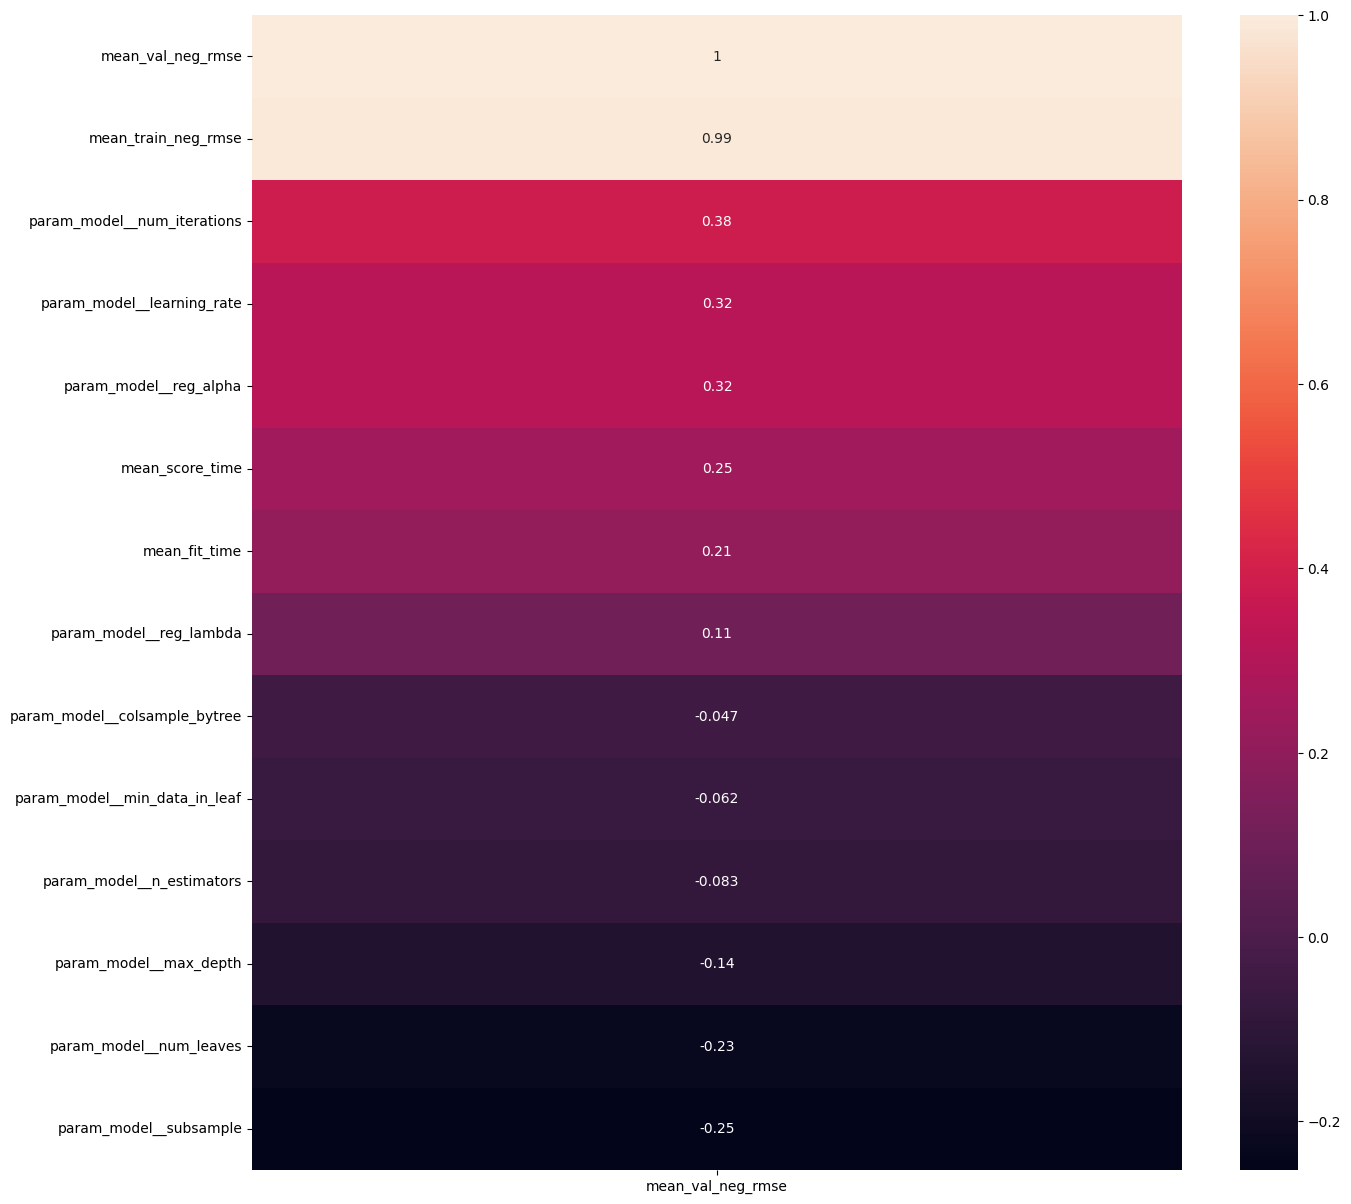

In [38]:
import seaborn as sns
hparam_list = [
       'param_model__colsample_bytree',
       'param_model__learning_rate',
       'param_model__max_depth',
       'param_model__min_data_in_leaf',
       'param_model__n_estimators',
       'param_model__num_iterations',
       'param_model__num_leaves',
       'param_model__reg_alpha',
       'param_model__reg_lambda',
       'param_model__subsample',
       'mean_test_score',
       'mean_fit_time',
       'mean_train_score',
       'mean_score_time']
df_b_perf = df_b[hparam_list].apply(lambda x: pd.to_numeric(x), axis=1)
df_b_perf = df_b_perf.rename(columns={'mean_test_score': 'mean_val_neg_rmse'})
df_b_perf = df_b_perf.rename(columns={'mean_train_score': 'mean_train_neg_rmse'})
plt.figure(figsize=(15,15))
#sns.heatmap(df_b_perf.corr(method='pearson'), cbar=True, annot=True)
sns.heatmap( df_b_perf.corr(method='pearson').loc[:, ['mean_val_neg_rmse']].sort_values(by='mean_val_neg_rmse', ascending=False),
             cbar=True,
             annot=True )


<img src="https://drive.google.com/uc?export=view&id=18HFGTQZ8DWid_D1n1SGhwVcSPdMPlv2k" width ="900">


To measure hyperparameters effect on the performance, I calculated the Pearson correlation coefficient for negative average validation RMSE with respect to each hyperparameter.


 In above figure, I display correlation coefficients sorted by performance using RMSE. Notably, the subsample ratio of features (columns), number of iterations, learning rate, L2 regularization term, L1 regularization term, and max. depth hyperparameters have significant impacts on validation performance, in that order. Among these, the subsample ratio of features, number of iterations, and learning rate exert particularly strong influences.

Moreover, I observe a positive correlation between the subsample ratio of features and validation performance. Similarly, the number of training iterations, learning rate, and L2 regularization also demonstrate a strong positive relationship with validation performance.

An interesting finding is the occurrence of a very large L2 regularization term value. This behavior can be explained by examining other hyperparameters such as a high number of iterations (500) and leaves (500). The complexity introduced by these high values prompts the model to utilize high L2 regularization.

Conversely, the L1 regularization term and max. depth exhibit a negative relationship with validation performance.






<Axes: >

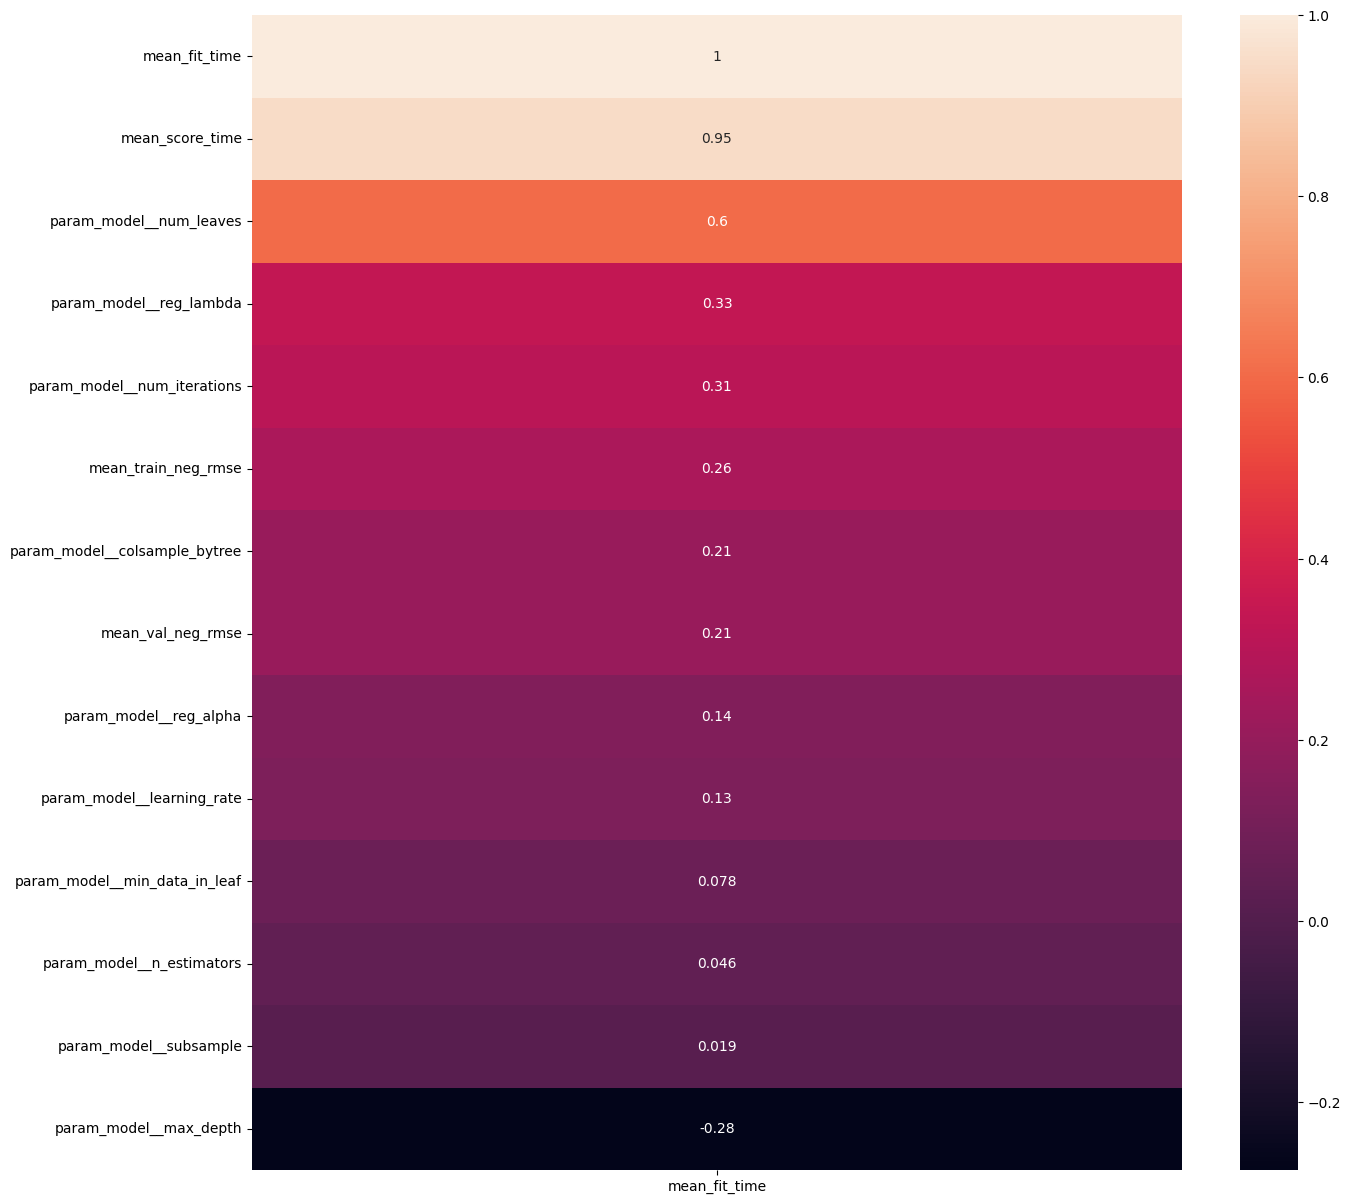

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap( df_b_perf.corr(method='pearson').loc[:, ['mean_fit_time']].sort_values(by='mean_fit_time', ascending=False),
             cbar=True,
             annot=True )


<img src="https://drive.google.com/uc?export=view&id=1zf2Rmt1NasvVJCn0P-Yx7p5TCth6Z0us" width ="900">


Above figure illustrates the correlation between the absolute difference in average training and validation RMSEs, serving as a measure of regularization or generalization gap effects. The negative correlation coefficients indicate that increasing L1 and L2 regularization terms enhances generalization. Likewise, raising the minimum number of observations required for a leaf node improves generalization.

While reducing the number of estimators and max. depth typically correlates with better generalization, the associated correlation coefficients lack significance. This could be due to a relatively limited subspace search, where these hyperparameters may be offset by others with opposing effects.

Moreover, increasing the number of training iterations, subsample ratio of features (columns), and number of leaves substantially decreases generalization, as expected, given their propensity to increase complexity. Similarly, raising the learning rate diminishes generalization, as excessively high rates may lead to overfitting.






<Axes: >

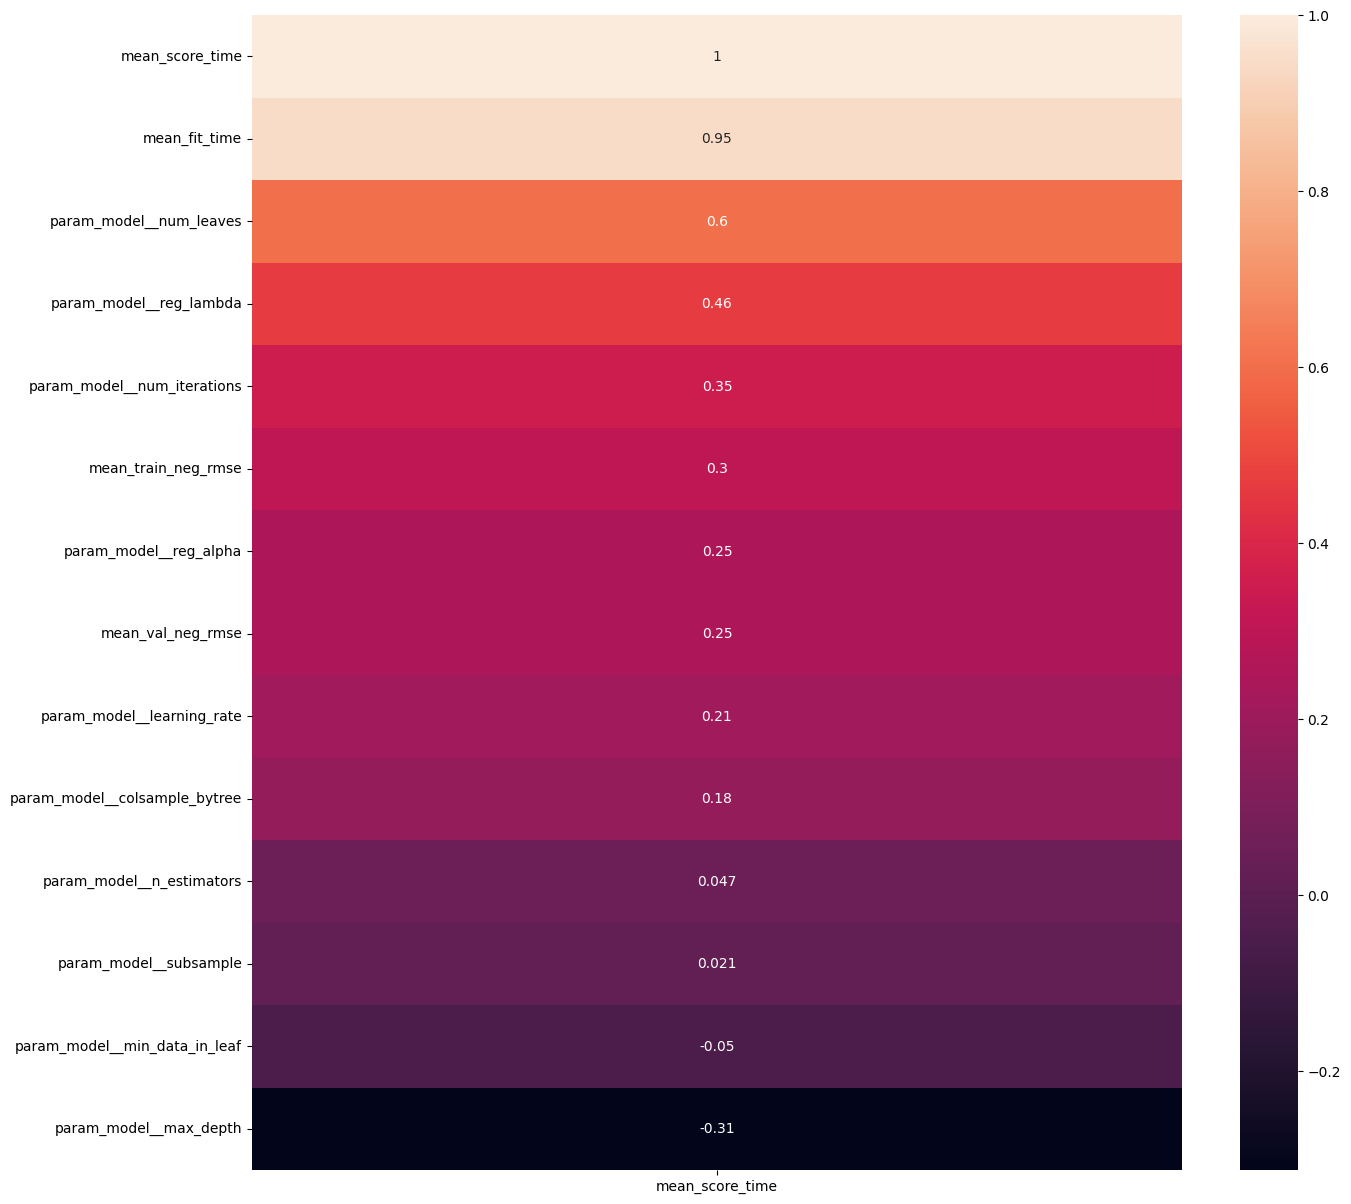

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap( df_b_perf.corr(method='pearson').loc[:, ['mean_score_time']].sort_values(by='mean_score_time', ascending=False),
             cbar=True,
             annot=True )




<img src="https://drive.google.com/uc?export=view&id=1KIJPshnlRyhb19850eAnqcuS-6UYvfUO" width ="900">


As depicted in above figure, I assessed the impact of hyperparameters on model training efficiency by computing sorted Pearson correlation coefficients for the average fit time relative to the hyperparameters.






<Axes: >

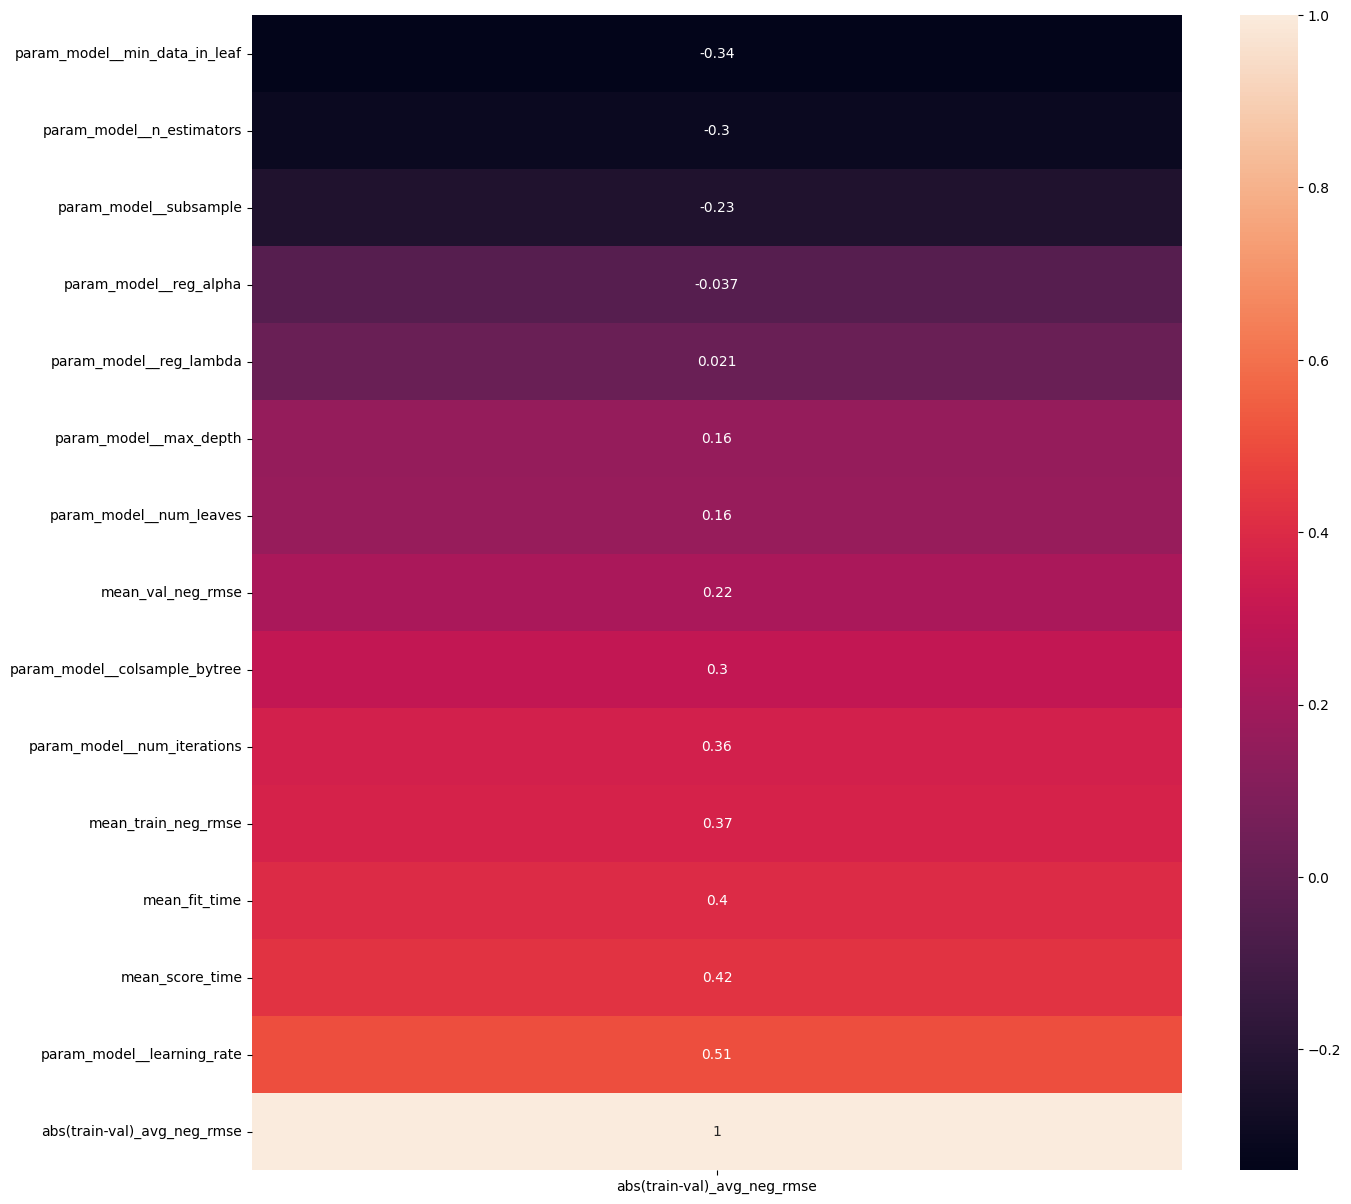

In [41]:
df_b_perf['abs(train-val)_avg_neg_rmse'] = np.abs(df_b_perf['mean_train_neg_rmse'] - df_b_perf['mean_val_neg_rmse'])
plt.figure(figsize=(15,15))
sns.heatmap( df_b_perf.corr(method='pearson').loc[:, ['abs(train-val)_avg_neg_rmse']].sort_values(by='abs(train-val)_avg_neg_rmse', ascending=True),
             cbar=True,
             annot=True )


<img src="https://drive.google.com/uc?export=view&id=1YFMP9yIfUDFktqhrIm_mPH6wzmY5IlwW" width ="900">


Similarly, as illustrated in above figure, I gauged the impact of hyperparameters on model evaluation efficiency by computing sorted Pearson correlation coefficients for the average score time relative to the hyperparameters.

It is noted that increasing the number of leaves, subsample ratio of features (columns), and the number of training iterations significantly prolongs the average fit time, consequently diminishing efficiency.

Although elevating the values of the number of estimators and max. depth typically correlates with reduced efficiency, the associated correlation coefficients lack significance. Once again, this observation might be attributed to a relatively limited subspace search, wherein these hyperparameters may be counterbalanced by others with opposing effects.

Furthermore, augmenting the L1 regularization term and the minimum number of observations required for a leaf node decreases the average fit time.




